<a href="https://colab.research.google.com/github/g23ai2068/Capstone-Project/blob/g23ai2026_saif/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

sns.set()

# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]

In [53]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [54]:
#data Preprocessing
calendar = pd.read_csv('/content/drive/MyDrive/AirBNB/calendar.csv')

listings = pd.read_csv('/content/drive/MyDrive/AirBNB/listings.csv')

Neighbourhood = pd.read_csv('/content/drive/MyDrive/AirBNB/neighbourhoods.csv')

Reviews = pd.read_csv('/content/drive/MyDrive/AirBNB/reviews.csv')

directory='/content/drive/MyDrive'



<ipython-input-54-873cc95ac444>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv('/content/drive/MyDrive/AirBNB/calendar.csv')


In [55]:
calendar.head()



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,available_unit
0,958,04-09-2024,t,$170.00,NaN,2,1125,8
1,958,05-09-2024,f,$170.00,NaN,2,1125,6
2,958,06-09-2024,f,$170.00,NaN,2,1125,6
3,958,07-09-2024,f,$170.00,NaN,2,1125,2
4,958,08-09-2024,f,$170.00,NaN,2,1125,8


In [56]:
# looking the shape DataSet
calendar.shape

(1048575, 8)

In [57]:
calendar.shape[0]

1048575

In [58]:
calendar.shape[1]

8

In [59]:
#calendar.dropna(axis=0,inplace=True)

#print(calendar)

In [60]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,available_unit
0,958,04-09-2024,t,$170.00,NaN,2,1125,8
1,958,05-09-2024,f,$170.00,NaN,2,1125,6
2,958,06-09-2024,f,$170.00,NaN,2,1125,6
3,958,07-09-2024,f,$170.00,NaN,2,1125,2
4,958,08-09-2024,f,$170.00,NaN,2,1125,8


In [61]:
calendar.shape

(1048575, 8)

In [62]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1048575 non-null  int64 
 1   date            1048575 non-null  object
 2   available       1048575 non-null  object
 3   price           1048575 non-null  object
 4   adjusted_price  730 non-null      object
 5   minimum_nights  1048575 non-null  int64 
 6   maximum_nights  1048575 non-null  int64 
 7   available_unit  1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [63]:
# Assuming your DataFrame is named calendar
# Dropping the 'adjusted_price'
calendar = calendar.drop(columns=['adjusted_price'])

# Display the modified DataFrame
print(calendar.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1048575 non-null  int64 
 1   date            1048575 non-null  object
 2   available       1048575 non-null  object
 3   price           1048575 non-null  object
 4   minimum_nights  1048575 non-null  int64 
 5   maximum_nights  1048575 non-null  int64 
 6   available_unit  1048575 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 56.0+ MB
None


In [64]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,available_unit
0,958,04-09-2024,t,$170.00,2,1125,8
1,958,05-09-2024,f,$170.00,2,1125,6
2,958,06-09-2024,f,$170.00,2,1125,6
3,958,07-09-2024,f,$170.00,2,1125,2
4,958,08-09-2024,f,$170.00,2,1125,8


In [65]:
calendar.isna().sum().sum()


0

In [74]:
#calendar['available'] = pd.to_numeric(calendar['available'], errors='coerce').astype('Int64')
#calendar['available_unit'] = pd.to_numeric(calendar['available_unit'], errors='coerce').astype('Int64)
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').str.strip()
#calendar['price'] = pd.to_numeric(df['price'], errors='coerce')
calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable int

#calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce').astype('int64')


print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1048575 non-null  int64 
 1   date            1048575 non-null  object
 2   available       1048575 non-null  object
 3   price           1048575 non-null  Int64 
 4   minimum_nights  1048575 non-null  int64 
 5   maximum_nights  1048575 non-null  int64 
 6   available_unit  1048575 non-null  int64 
dtypes: Int64(1), int64(4), object(2)
memory usage: 57.0+ MB
None


In [75]:
calendar.head(10)

,listing_id,date,available,price,minimum_nights,maximum_nights,available_unit
0,958,04-09-2024,t,170,2,1125,8
1,958,05-09-2024,f,170,2,1125,6
2,958,06-09-2024,f,170,2,1125,6
3,958,07-09-2024,f,170,2,1125,2
4,958,08-09-2024,f,170,2,1125,8
5,958,09-09-2024,f,170,2,1125,3
6,958,10-09-2024,f,170,2,1125,4
7,958,11-09-2024,f,170,2,1125,2
8,958,12-09-2024,f,170,2,1125,5
9,958,13-09-2024,f,170,2,1125,7


In [76]:
print(calendar.describe())

        listing_id        price  minimum_nights  maximum_nights  \
count  1.048575e+06   1048575.0    1.048575e+06    1.048575e+06   
mean   1.621502e+07  261.819355    2.411912e+01    7.476192e+06   
std    1.147135e+07  649.118297    5.851778e+01    1.264793e+08   
min    9.580000e+02         0.0    1.000000e+00    1.000000e+00   
25%    5.094146e+06        99.0    2.000000e+00    6.000000e+01   
50%    1.606850e+07       150.0    5.000000e+00    9.990000e+02   
75%    2.591230e+07       249.0    3.000000e+01    1.125000e+03   
max    3.628043e+07     10000.0    1.125000e+03    2.147484e+09   

       available_unit  
count    1.048575e+06  
mean     5.499246e+00  
std      2.872590e+00  
min      1.000000e+00  
25%      3.000000e+00  
50%      6.000000e+00  
75%      8.000000e+00  
max      1.000000e+01  


In [77]:
calendar["price"].describe().round(2)

,price
count,1048575.0
mean,261.82
std,649.12
min,0.0
25%,99.0
50%,150.0
75%,249.0
max,10000.0


In [78]:
calendar.isnull().sum() * 100 / len(calendar)

,0
listing_id,0.0
date,0.0
available,0.0
price,0.0
minimum_nights,0.0
maximum_nights,0.0
available_unit,0.0


In [79]:
#checking duplicated value

calendar.duplicated().sum()

0

We have some outliers in the data and some extreme values as well.

Let's use Tukey rule to detect the outliers.

**Identify Outliers**

In [80]:
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)

IQR = Q3 -Q1

Max = Q3 + 1.5*IQR
Min = Q1 - 1.5*IQR
print('Min value {} , Max value {}'.format(Min,Max))

Min value -126.0 , Max value 474.0


count     1048575.0
mean     261.819355
std      649.118297
min             0.0
25%            99.0
50%           150.0
75%           249.0
max         10000.0
Name: price, dtype: Float64


<Axes: title={'center': 'Box_plot_Distribution'}>

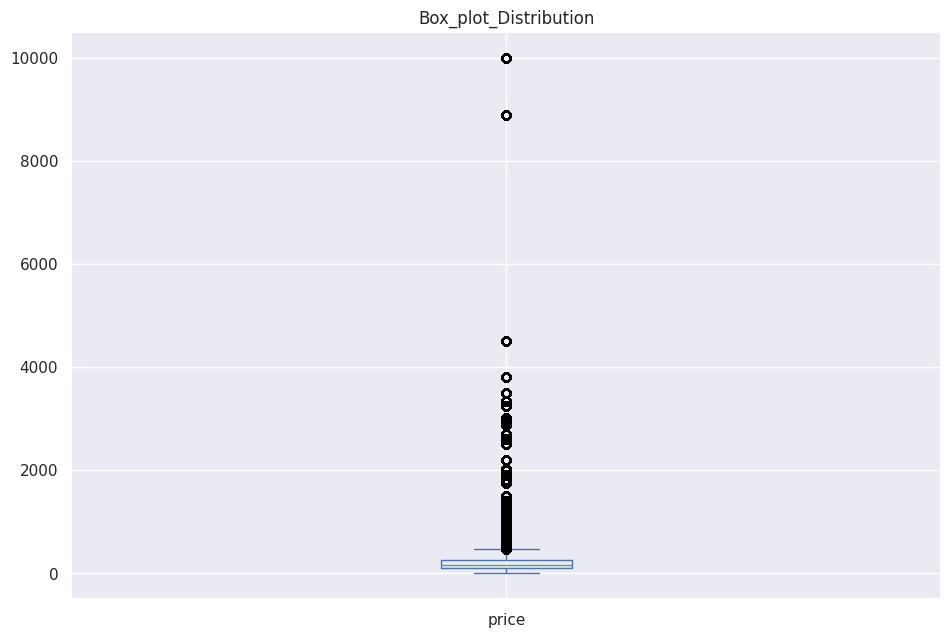

In [81]:
print(calendar['price'].describe())
plt.title('Box_plot_Distribution')
calendar['price'].plot(kind ='box')

**Visualize Missing Values**

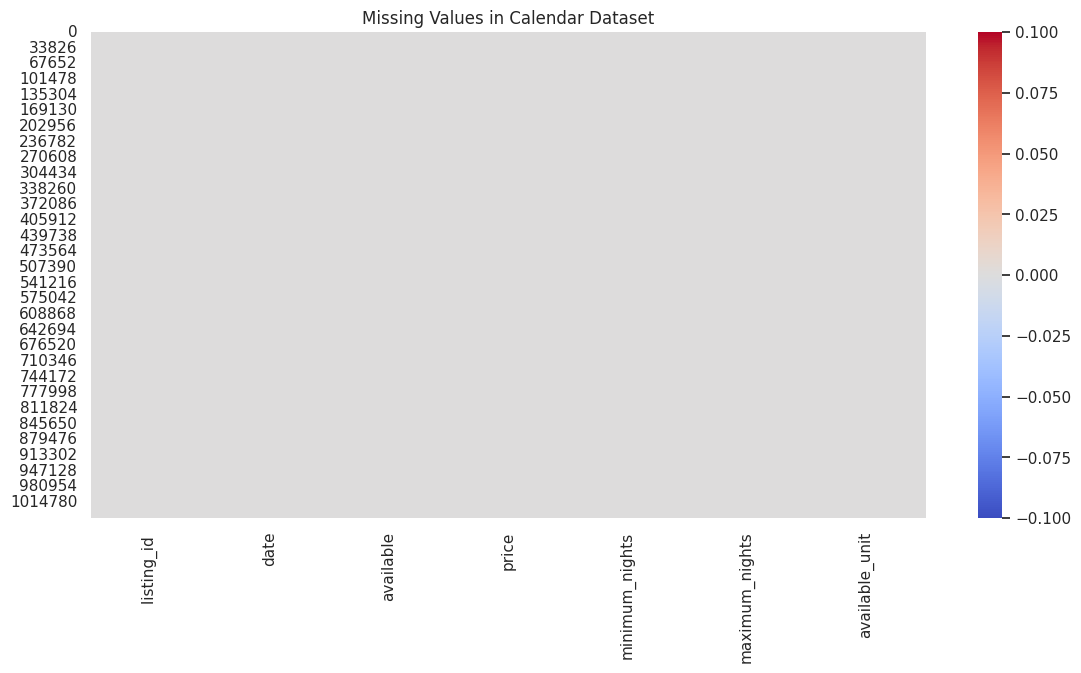

In [82]:
plt.figure(figsize=(12, 6))
sns.heatmap(calendar.isnull(), cbar=True, cmap='coolwarm')
plt.title('Missing Values in Calendar Dataset')
plt.show()



**Data Cleaning Strategies**

In [83]:
# Fill missing values in the 'available_unit' column with the median
calendar['available_unit'] = calendar['available_unit'].fillna(calendar['available_unit'].median())

# Fill missing values in the 'available' column with 'Unknown'
calendar['available'] = calendar['available'].fillna('Unknown')


# Cap prices at a certain threshold
calendar = calendar[calendar['maximum_nights'] < 1000]  # Adjust threshold as needed



In [84]:
print(calendar.describe())


        listing_id        price  minimum_nights  maximum_nights  \
count  5.281140e+05    528114.0   528114.000000   528114.000000   
mean   1.585007e+07  268.794658       20.945826      143.586894   
std    1.173030e+07  698.645934       45.410663      185.439047   
min    5.858000e+03         0.0        1.000000        1.000000   
25%    4.343722e+06        95.0        2.000000       28.000000   
50%    1.600105e+07       141.0        4.000000       60.000000   
75%    2.544387e+07       240.0       30.000000      180.000000   
max    3.628043e+07     10000.0      365.000000      999.000000   

       available_unit  
count   528114.000000  
mean         5.503522  
std          2.872849  
min          1.000000  
25%          3.000000  
50%          6.000000  
75%          8.000000  
max         10.000000  


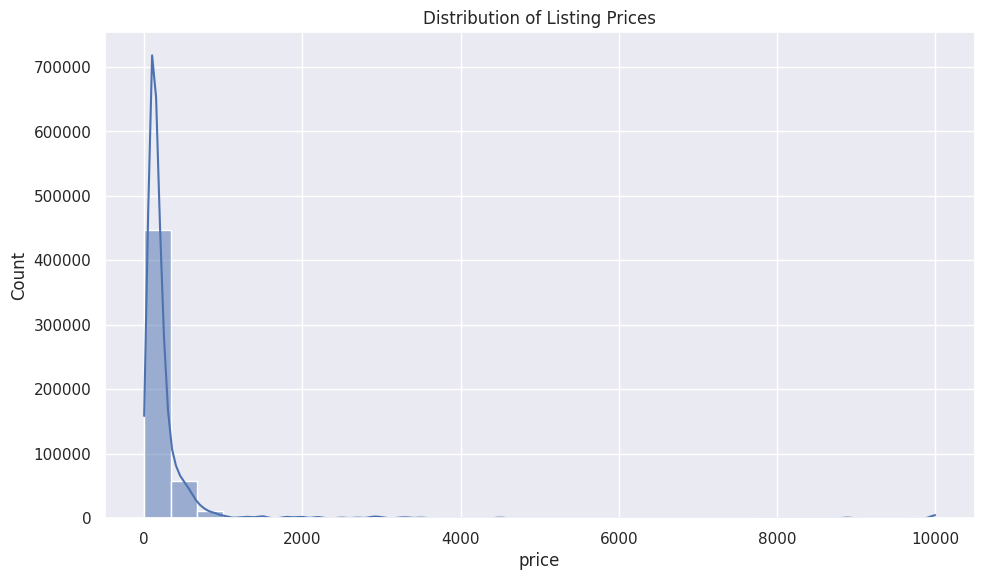

In [85]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(calendar['price'], bins=30, kde=True)
plt.title('Distribution of Listing Prices')
plt.show()